# Introducción a la inferencia estadística
# IE05 Distribuciones de probabilidad continuas

Nota: Parte de los contenios de este notebook están basados en el trabajo de Raúl E. López Briega. El contenido esta bajo la licencia BSD de Raúl E. López Briega.

In [1]:
from scipy import stats

import numpy as np
import matplotlib.pyplot as plt

## <font color='blue'>Distribuciones continuas</font>

Ahora que ya conocemos las principales **distribuciones discretas**, podemos pasar a describir a las [distribuciones continuas](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_de_probabilidad_continua); en ellas a diferencia de lo que veíamos antes, la variable puede tomar cualquier valor dentro de un intervalo específico. Dentro de este grupo vamos a encontrar a las siguientes: 

## Distribución de Normal

Valores: $-\infty \lt x \lt \infty$

Parámetros:

$\mu$: media, $-\infty \lt \mu \lt \infty$<br>
$\sigma$: desviación estándar, $\sigma \gt 0$

La [Distribución Normal](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_normal) es, sin duda, la distribución de probabilidad más importante del Cálculo de probabilidades y de la Estadística. Fue descubierta, como aproximación de la distribución binomial, por Abraham De Moivre (1667-1754) y publicada en 1733 en su libro The Doctrine of Chances; estos resultados fueron ampliados por Pierre-Simon Laplace (1749-1827), quién también realizó aportaciones importantes. En 1809, Carl Friedrich Gauss (1777-1855) publicó un libro sobre el movimiento de los cuerpos celestes donde asumía errores normales, por este motivo esta distribución también es conocida como distribución Gaussiana. Está dada por la formula:

$$p(x;\mu, \sigma^2) = \frac{1}{\sigma \sqrt{2 \pi}} e^{\frac{-1}{2}\left(\frac{x - \mu}{\sigma} \right)^2}
$$

En donde $\mu$ es el parámetro de ubicación, y va a ser igual a la media aritmética y $\sigma$ es la desviación estándar. Algunos ejemplos de variables asociadas a fenómenos naturales que siguen el modelo de la Distribución Normal son:
* Características morfológicas de individuos, como la estatura.
* Características sociológicas, como el consumo de cierto producto por un mismo grupo de individuos.
* Características psicológicas, como el cociente intelectual.
* Nivel de ruido en telecomunicaciones.
* Errores cometidos al medir ciertas magnitudes.
* En particular, muchas medidas de datos continuos en medicina y en biología (talla, presión arterial, etc.) se aproximan a la distribución normal.
* etc.

La importancia de la distribución normal queda totalmente consolidada por ser la
distribución límite de numerosas variables aleatorias, discretas y continuas, como se demuestra a través de los teoremas centrales del límite. Las consecuencias de estos teoremas implican la casi universal presencia de la distribución normal en todos los campos de las ciencias empíricas: biología, medicina, psicología, física, economía, etc. 

Cuando la distribución normal tiene como parámetros $\mu = 0$ y $\sigma = 1$ recibe el nombre de **distribución normal estándar**. Cualquier variable $X$ que siga una distribución normal de
parámetros $\mu$ y $\sigma$ se puede transformar en otra variable $Y= (X-\mu)/\sigma$ que sigue una distribución normal estándar; este proceso se denomina estandarización, tipificación o normalización.

A considerar:
* Entre el primer **sigma** ($\sigma$) positivo y el primer **sigma** negativo se encuentra el 68% de los casos.
* Entre el segundo **sigma** positivo y el segundo **sigma** negativo se encuentra el 95,5% de los casos. 
* Entre el tercer **sigma** positivo y el tercer **sigma** negativo se encuentra el 99,73% de los casos.

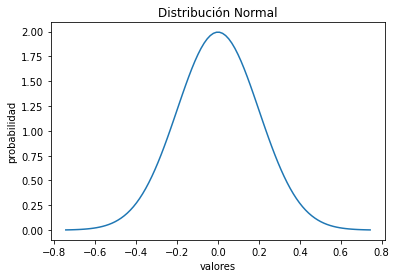

In [ ]:
# Graficando Normal
mu, sigma = 0, 0.2 # media y desvio estandar
normal = stats.norm(mu, sigma)
x = np.linspace(normal.ppf(0.0001),
                normal.ppf(0.9999), 100)
fp = normal.pdf(x) # Función de Probabilidad
plt.plot(x, fp)
plt.title('Distribución Normal')
plt.ylabel('probabilidad')
plt.xlabel('valores')
plt.show()

In [ ]:
mean, var, skew, kurt = normal.stats(moments='mvsk')
print('Momentos')
print(f'Primer momento: Media = {mean: 4.2f}')
print(f'Segundo momento: Varianza = {var: 4.2f}')
print(f'Tercer momento: Asimetría (skewness) = {skew: 4.2f}')
print(f'Cuarto momento: Curtosis = {kurt: 4.2f}')

Momentos
Primer momento: Media =  0.00
Segundo momento: Varianza =  0.04
Tercer momento: Asimetría (skewness) =  0.00
Cuarto momento: Curtosis =  0.00


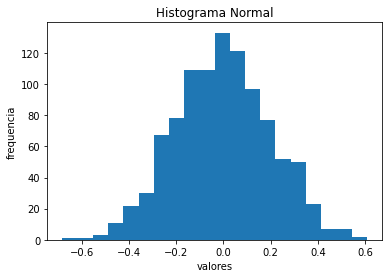

In [ ]:
# histograma
aleatorios_n = normal.rvs(1000) # genera aleatorios
frecuencia, bins, ignorar = plt.hist(aleatorios_n, 20)
plt.ylabel('frequencia')
plt.xlabel('valores')
plt.title('Histograma Normal')
plt.show()

In [ ]:
# Calculemos los parámetros de la población
print(f'Media poblacional\t\t= {aleatorios_n.mean():4.2f}')
print(f'Desviación estándar poblacional\t= {aleatorios_n.std():4.2f}')
print(f'Mediana poblacional\t\t= {np.median(aleatorios_n):4.2f}')
print(f'Moda poblacional es {stats.mode(aleatorios_n)[0][0]} y se repite {stats.mode(aleatorios_n)[1][0]} veces')

Media poblacional		= -0.00
Desviación estándar poblacional	= 0.20
Mediana poblacional		= 0.00
Moda poblacional es -0.6417786592783519 y se repite 1 veces


Numpy también nos ayuda a crear distribuciones normales (y de otros tipos también).

In [ ]:
np.random.seed(1)
mu = 0 # loc
sigma = 1 # sigma
size = 1000
# Generamos la población con la semilla creada
# donde: np.random.normal(media, sigma, size)
n = np.random.normal(mu, sigma, size) 

# esto es equivalente a 
# rvs genera variables aleatorias; retorna un np.array
n2 = stats.norm.rvs(loc=mu, scale=sigma, size=size)

Grafiquemos ahora la KDE (Kernel Density Function)

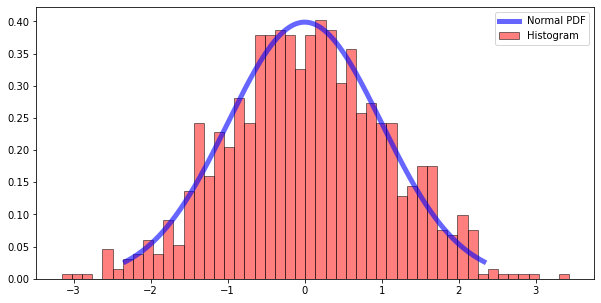

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,5))


# al generar el espacio lineal, debemos ajustar la ubicación y la escala
nx = np.linspace(stats.norm.ppf(0.01, loc=mu, scale=sigma),
                 stats.norm.ppf(0.99, loc=mu, scale=sigma), num=size)


ax.plot(nx, stats.norm.pdf(nx, loc=mu, scale=sigma),
        'b-', 
        lw=5, 
        alpha=0.6, 
        label='Normal PDF')


#plt.plot(x, expon.pdf(e))
ax.hist(n2, bins=50, 
        density=True, 
        # histtype='stepfilled', 
        color='r', 
        alpha=0.5, 
        edgecolor='black',
        label='Histogram')
plt.legend()
plt.show()

O la versión con **Seaborn** la cual muestra el KDE de forma automática en base activar (True) el argumento correspondiente (*kde*).


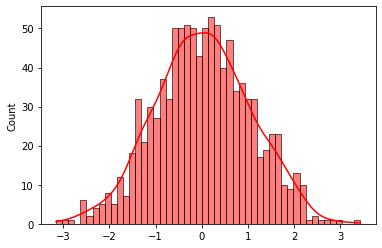

In [ ]:
import seaborn as sns

sns.histplot(n2, color="red", bins=50, 
              kde=True,
             edgecolor='black', alpha=0.5)
plt.show()

## Distribución Uniforme Continua

Valores: $a \lt x \lt b$

Parámetros:<br>
$a$: mínimo, $-\infty \lt a \lt \infty$<br>
$b$: máximo, $-\infty \lt b \lt \infty$, con $a \lt b$

La Distribución Uniforme es útil para describir una variable aleatoria con probabilidad constante sobre el intervalo $(a,b)$ en el que está definida y se denota por $U(a,b)$. También es conocida con el nombre de **distribución rectangular** por el aspecto de su función de
densidad.

Una peculiaridad importante de esta distribución es que la probabilidad de un suceso depende exclusivamente de la amplitud del intervalo considerado y no de su posición en el campo de variación de la variable. Cualquiera que sea la distribución $F$ de cierta variable $X$, la variable transformada $Y = F(X)$
sigue una distribución uniforme en el intervalo (0,1). Esta propiedad es fundamental por ser la base para la generación de números aleatorios de cualquier distribución en las técnicas de simulación, y recibe el nombre de **método de inversión**.

La Distribución Uniforma Continua es expresada por la función:

$$f(x; a, b) = \frac{1}{b -a} \ \mbox{para} \ a \le x \le b
$$

Su función de distribución esta entonces dada por:

$$
p(x;a, b) = \left\{
	\begin{array}{ll}
            0  & \mbox{si } x \le a \\
            \frac{x-a}{b-a} & \mbox{si } a \le x \le b \\
            1 & \mbox{si } b \le x
	\end{array}
\right.
$$

Todos los valore tienen prácticamente la misma probabilidad.

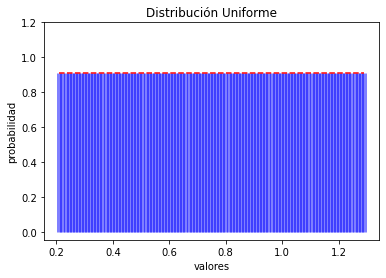

In [ ]:
# Graficando Uniforme Continua
# ATENCION: en scipy.stats el parametro b es un rango que se suma al parámetro a
# Luego si queremos obtener 
# a = 0.2
# b = 1.3
# Tenemos que hacer b = 1.3 - a
a= 0.2
b = 1.3 - a

uniforme_c = stats.uniform(a, b)
x = np.linspace(uniforme_c.ppf(0.01),
                uniforme_c.ppf(0.99), 100)
fp = uniforme_c.pdf(x) # Función de Probabilidad
fig, ax = plt.subplots()
ax.vlines(x, 0, fp, colors='b', lw=5, alpha=0.5)
ax.plot(x, fp, '--', color='r')
ax.set_yticks([0., 0.2, 0.4, 0.6, 0.8, 1., 1.2])
plt.title('Distribución Uniforme')
plt.ylabel('probabilidad')
plt.xlabel('valores')
plt.show()

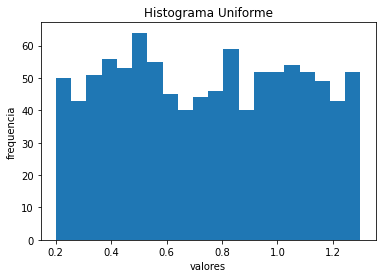

In [ ]:
# histograma
aleatorios_c = uniforme_c.rvs(1000) # genera aleatorios
frecuencia, bins, ignorar = plt.hist(aleatorios_c, 20)
plt.ylabel('frequencia')
plt.xlabel('valores')
plt.title('Histograma Uniforme')
plt.show()

### <font color='green'>Actividad  1</font>

Un contratista A está preparando una oferta sobre un nuevo proyecto de construcción. La oferta sigue una distribución uniforme entre 55 y 75 millones de pesos. Determínese:
1. La probabilidad de que la oferta sea superior a 60 millones de pesos.
2. La media y la desviación estándar de la oferta.

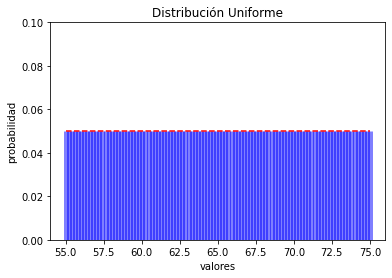


La probabilidad de que la oferta sea superior a 60 millones de peso es de 0.75

----------------------------------------
La media de la oferta es de 			 65.00
La desviación estándar de la oferta es de 	  5.77


In [ ]:
# Tu código aquí ...

# 1. La probabilidad de que la oferta sea superior a 60 millones de pesos.

a= 55
b = 75 - a

uniforme_c = stats.uniform(a, b)
x = np.linspace(uniforme_c.ppf(0.00001),
                uniforme_c.ppf(0.99999), 100)
fp = uniforme_c.pdf(x) # Función de Probabilidad
fig, ax = plt.subplots()
ax.vlines(x, 0, fp, colors='b', lw=5, alpha=0.5)
ax.plot(x, fp, '--', color='r')
ax.set_yticks([0., 0.02, 0.04, 0.06, 0.08, 0.1, 0.12])
plt.title('Distribución Uniforme')
plt.ylabel('probabilidad')
plt.ylim([0, 0.1])
plt.xlabel('valores')
plt.show()

probMas60 = 1 - uniforme_c.cdf(60) # Función de Probabilidad

print()
print(f'La probabilidad de que la oferta sea superior a 60 millones de peso es de {probMas60}')
print()

#2. La media y la desviación estándar de la oferta.

print(10*'----')
print(f'La media de la oferta es de \t\t\t{uniforme_c.mean(): 2.2f}')
print(f'La desviación estándar de la oferta es de \t {uniforme_c.std(): 2.2f}')


<font color='green'>Fin actividad 1</font>

## Distribución de Log-normal
Valores: $0 \lt x \lt \infty$

Parámetros:<br>
$\mu$: escala, $-\infty < \mu < \infty$<br>
$\sigma$: forma, $\sigma$ > 0

La variable resultante de aplicar la función exponencial a una variable que se distribuye de forma normal con media $\mu$ y desviación estándar $\sigma$, sigue una distribución [Distribución Log-normal](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_log-normal) con parámetros $\mu$ (escala) y $\sigma$ (forma). Dicho de otro modo, si una variable $X$ sigue una distribución lognormal entonces la variable $lnX$ se distribuye normalmente. Esta variable
aleatoria fue propuesta por Francis Galton (1822-1911) en 1879, como consecuencia del estudio de la media geométrica de $n$ variables aleatorias independientes. La Distribución de Log-normal está dada por la formula:

$$p(x;\mu, \sigma) = \frac{1}{ x \sigma \sqrt{2 \pi}} e^{\frac{-1}{2}\left(\frac{\ln x - \mu}{\sigma} \right)^2}
$$

En dónde la variable $x > 0$, $\mu \in \mathbb{R}$  y $\sigma > 0$, son todos números reales. La Distribución Log-normal es aplicable a variables aleatorias que están limitadas por cero, pero tienen pocos valores grandes. Es una distribucióncon asimetría positiva. Algunos de los ejemplos en que la solemos encontrar son:
* El peso de los adultos.
* La concentración de los minerales en depósitos.
* Duración de licencia por enfermedad.
* Distribución de riqueza
* Tiempos muertos de maquinarias.
* La distribución lognormal es útil para modelar datos de numerosos estudios médicos tales como el período de incubación de una enfermedad, los títulos de anticuerpo a un virus, el tiempo de supervivencia en pacientes con cáncer o SIDA, el tiempo hasta la seroconversión de VIH+, etc.


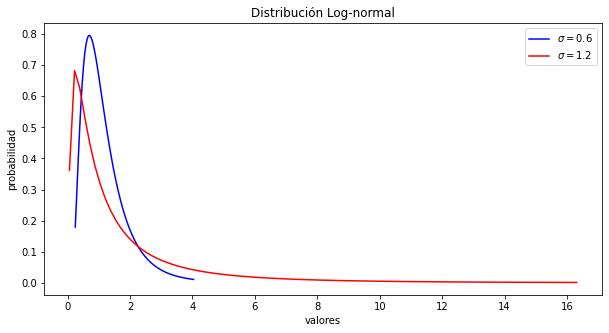

In [ ]:
# Graficando Log-Normal
sigma1 = 0.6 # parámetro
sigma2 = 1.2 # parámetro
lognormal1 = stats.lognorm(sigma1)
lognormal2 = stats.lognorm(sigma2)

x1 = np.linspace(lognormal1.ppf(0.01),
                lognormal1.ppf(0.99), 100)
x2 = np.linspace(lognormal2.ppf(0.01),
                lognormal2.ppf(0.99), 100)
fp1 = lognormal1.pdf(x1) # Función de Probabilidad
fp2 = lognormal2.pdf(x2) # Función de Probabilidad

fig, ax = plt.subplots(1, 1, figsize=(10,5))
plt.plot(x1, fp1, color='b', label=r'$\sigma = {}$'.format(sigma1))
plt.plot(x2, fp2, color='r', label=r'$\sigma = {}$'.format(sigma2))
plt.title('Distribución Log-normal')
plt.ylabel('probabilidad')
plt.xlabel('valores')
plt.legend(loc=1)
plt.show()

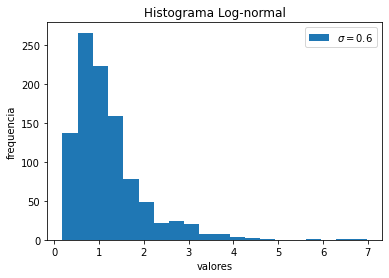

In [ ]:
# histograma
aleatorios_ln = lognormal1.rvs(1000) # genera aleatorios
frecuencia, bins, ignorar = plt.hist(aleatorios_ln, 20, label=r'$\sigma = {}$'.format(sigma1))
plt.ylabel('frequencia')
plt.xlabel('valores')
plt.title('Histograma Log-normal')
plt.legend(loc=1)
plt.show()

### Distribución de Exponencial
Valores: $0 \lt x \lt \infty$<br>

Parámetro: $\lambda$: tasa de ocurrencia, con $\lambda \gt 0$

La [Distribución Exponencial](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_exponencial) es un caso particular de la **distribución gamma** (cuando ésta presenta parametros $\alpha=1$ y $\beta=1$) y el equivalente continuo de la **distribución geométrica discreta**. Esta ley de distribución describe procesos en los que interesa saber el tiempo hasta que ocurre determinado evento; en particular, se utiliza para modelar tiempos de supervivencia. Esta dada por la formula:

$$p(x;\lambda) = \lambda e^{-\lambda x}$$

O también se describe de la siguiente forma:

$$p(x;\alpha) = \frac{1}{ \alpha} e^{\frac{-x}{\alpha}}$$
donde 
$\alpha = \frac{1}{\lambda}$, y corresponde a la media o escala (en *scipy*)

En dónde tanto la variable $x$ como el parámetro $\alpha$ (o $\lambda$, según el caso) son números reales positivos.  

Ejemplos de variables que se comportan de forma exponencial son:
* El tiempo que tarda una partícula radiactiva en desintegrarse. 
* La datación de fósiles o cualquier materia orgánica mediante la técnica del carbono 14. Esto es, el tiempo que tarda una partícula radiactiva en desintegrarse. 
* El tiempo de supervivencia.
* El tiempo transcurrido en un centro de llamadas hasta recibir la primera llamada del día se podría modelar como una exponencial.
* El intervalo de tiempo entre terremotos (de una determinada magnitud) sigue una distribución exponencial.
* Supongamos una máquina que produce hilo de alambre, la cantidad de metros de alambre hasta encontrar una falla en el alambre se podría modelar como una exponencial.
* En fiabilidad de sistemas, un dispositivo con tasa de fallo constante sigue una distribución exponencial.
* El grado de los nodos de un grafo del tipo Scale-Free.
* El tiempo entre eventos en un proceso de **Poisson** donde los acontecimientos suceden a una velocidad constante.

Una característica importante de esta distribución es la propiedad conocida como “__falta de memoria__”. Esto significa, por ejemplo, que la probabilidad de que un individuo de edad $t$ sobreviva $x$ años más, hasta la edad $x+t$, es la misma que tiene un recién nacido de sobrevivir hasta la edad $x$. Dicho de manera más general, el tiempo transcurrido desde cualquier instante dado $t_0$ hasta que ocurre el evento, no depende de lo que haya ocurrido antes del instante $t_0$. Esta falta de memoria ha hecho que su aplicación sea restrictiva en disciplinas cono la bioestadística.

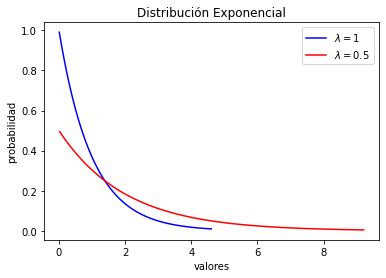

In [ ]:
# Graficando Exponencial
lambda1 = 1
lambda2 = 0.5
exponencial1 = stats.expon(loc=0, scale=1/lambda1)
exponencial2= stats.expon(loc=0, scale=1/lambda2)
x1 = np.linspace(exponencial1.ppf(0.01),
                exponencial1.ppf(0.99), 100)
x2 = np.linspace(exponencial2.ppf(0.01),
                exponencial2.ppf(0.99), 100)
fp1 = exponencial1.pdf(x1) # Función de Probabilidad
fp2 = exponencial2.pdf(x2) # Función de Probabilidad
plt.plot(x1, fp1, color='b', label=r'$\lambda = {}$'.format(lambda1))
plt.plot(x2, fp2, color='r', label='$\lambda = {}$'.format(lambda2))
plt.title('Distribución Exponencial')
plt.ylabel('probabilidad')
plt.xlabel('valores')
plt.legend(loc=1)
plt.show()

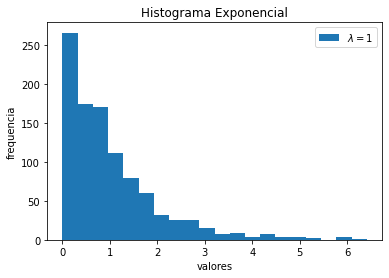

In [ ]:
# histograma
aleatorios_e = exponencial1.rvs(1000) # genera aleatorios
frecuencia, bins, ignorar = plt.hist(aleatorios_e, 20, label=r'$\lambda = {}$'.format(lambda1))
plt.ylabel('frequencia')
plt.xlabel('valores')
plt.title('Histograma Exponencial')
plt.legend(loc=1)
plt.show()

### <font color='green'>Actividad 2</font>
Se ha comprobado que el tiempo de vida de cierto tipo de marcapasos sigue una distribución exponencial con media de 14 años. 

¿Cuál es la probabilidad de que a una persona a la que se le ha implantado este marcapasos se le deba reimplantar otro antes de 20 años? 

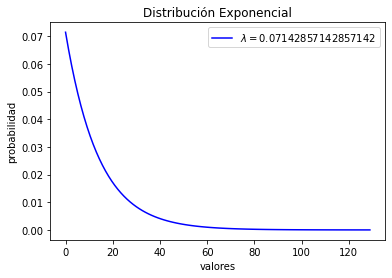

La probabilidad de que a una persona se le implante un marcapasos antes de los 20 años es 0.76


In [ ]:
# Tu código aquí ...

lambda1 = 1/14
exponencial1 = stats.expon(loc=0, scale=1/lambda1)
x1 = np.linspace(exponencial1.ppf(0.0001),
                exponencial1.ppf(0.9999), 100)
fp1 = exponencial1.pdf(x1) # Función de Probabilidad
plt.plot(x1, fp1, color='b', label=r'$\lambda = {}$'.format(lambda1))
plt.title('Distribución Exponencial')
plt.ylabel('probabilidad')
plt.xlabel('valores')
plt.legend(loc=1)
plt.show()

# ¿Cuál es la probabilidad de que a una persona a la que se le ha implantado este marcapasos se le deba reimplantar otro antes de 20 años?
p20min = exponencial1.cdf(20)
print(f'La probabilidad de que a una persona se le implante un marcapasos antes de los 20 años es {p20min:.2f}')

<font color='green'>Fin actividad 2</font>

### <font color='green'>Actividad 3</font>
Se tiene la siguiente muestra de datos la cual se estima que obedece a una distribución exponencial.
1. Plotéela
2. Determine sus parámetros $loc$, $scale$ y $\lambda$

TIP: Utilice el método __fit()__. Investigue su uso en Internet.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [ ]:
X = [8.40891032,  2.42979798,  7.41087626,  2.07658934,  2.07942102,
     2.05530865,  6.30994587,  3.99588973,  3.70707989, 10.43483448,
     14.70587022,  2.01200242,  3.06941852,  4.84832306,  9.00752525,
     9.07117813, 16.55833492, 22.38003406,  6.13678848,  4.7812562 ,
     10.68406001,  2.42418443,  2.37650181,  3.18491342,  5.96838502,
     6.52244823, 12.45317295,  5.39234417,  2.08042209,  4.40999034,
     6.07874162,  5.21970867,  2.77401095,  2.86450285,  3.25513552,
     8.93065797, 13.30397597,  6.1062236 ,  5.25363706,  3.98658329,
     8.73979283,  6.34348627,  3.43086867, 10.53076984,  2.70255324,
     2.90688431,  7.82853837,  3.39718563,  5.87617795, 10.76736805,
     18.70554873,  2.19083207,  3.28927204, 12.1232163 ,  2.24157214,
     3.99556614,  5.51093524,  7.35423425,  2.99553849,  6.62811081,
     2.49690948,  2.85070358,  3.12061713, 13.71521877,  4.80077239,
     4.86362772,  6.28718405,  2.23158758,  4.98815281,  7.56564173,
     7.47019838,  6.67810437,  6.64358648,  3.35564988,  5.03728286,
     6.21038159,  2.78578825,  2.37244931,  4.15946616,  5.97243514,
     3.42417909, 16.0417914 ,  5.47268766,  2.49115255, 12.28591699,
     8.9063991 ,  5.75684879,  7.21288755,  2.42932308,  5.06394995,
     4.02833108, 10.96521985,  4.25967641,  6.35314164,  3.2676458 ,
     2.03309176, 15.25884644,  5.22552613,  3.81524316,  4.11421473]



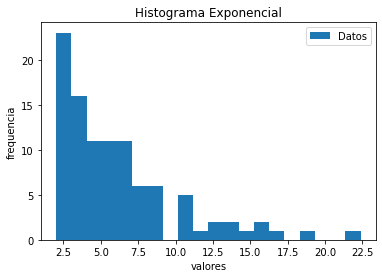

In [ ]:
frecuencia, bins, ignorar = plt.hist(X, 20, label='Datos')
plt.ylabel('frequencia')
plt.xlabel('valores')
plt.title('Histograma Exponencial')
plt.legend(loc=1)
plt.show()

El parametro loc es igual a 2.0
El parametro scale es igual a 4.143
El parametro lambda es igual a 0.241
--------------------------------------------------



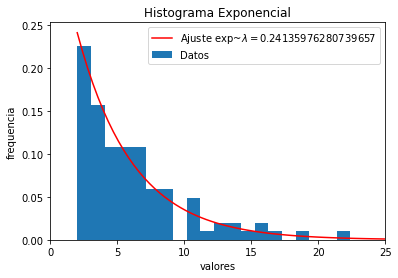

In [ ]:
# Determine sus parámetros  loc ,  scale  y  λ
loc, scale = stats.expon.fit(X, floc=2) #floc = 2
lambda3 = 1/scale
print(f'El parametro loc es igual a {loc}')
print(f'El parametro scale es igual a {scale:.3f}')
print(f'El parametro lambda es igual a {lambda3:.3f}')
print(10*'-----')
print()

exponencial_fit = stats.expon(loc=loc, scale=scale)
x3 = np.linspace(exponencial_fit.ppf(0.0001),
                exponencial_fit.ppf(0.9999), 100)

fp3 = exponencial_fit.pdf(x3) # Función de Probabilidad

frecuencia, bins, ignorar = plt.hist(X, 20, label='Datos', density=True)
plt.plot(x3, fp3, color='r', label=r'Ajuste exp~$\lambda = {}$'.format(1/scale))
plt.ylabel('frequencia')
plt.xlabel('valores')
plt.title('Histograma Exponencial')
plt.xlim([0, 25])
plt.legend(loc=1)
plt.show()


<font color='green'>Fin actividad 3</font>

## Distribución Gamma

Valores: $0 \lt x \lt \infty$

Parámetros:<br>
$\alpha$: forma, con $\alpha \gt 0$<br>
$\beta$: escala, con $\beta \gt 0$<br>

La [Distribución Gamma](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_gamma), es una distribución de probabilidad continua adecuada para modelizar el comportamiento de variables aleatorias con asimetría positiva y/o los experimentos en donde está involucrado el tiempo. Se denota por $Gamma(\alpha,\beta)$.

Está dada por la formula:

$$p(x;\alpha, \beta) = \frac{1}{\beta^\alpha \Gamma(\alpha)} x^{\alpha - 1} e^{-\frac{x}{\beta}} $$
y donde

$$\Gamma(\alpha) = \int_{0}^{\infty} x^{\alpha - 1}e^{-x} \,dx
$$
es la **función Gamma**.

Los parámetros $\alpha$ y $\beta$ y la variable $x$ son números reales positivos y $\Gamma(\alpha)$ es la [función gamma](https://es.wikipedia.org/wiki/Funci%C3%B3n_gamma). 

El primer parámetro, $\alpha$, sitúa la máxima intensidad de probabilidad y por este motivo es denominada la forma de la distribución. Cuando se toman valores
próximos a cero aparece entonces un dibujo muy similar al de la distribución exponencial. Cuando se toman valores grandes de $\alpha$, el centro de la distribución se desplaza a la derecha, por lo que va apareciendo la forma de la campana de Gauss con asimetría positiva. El segundo parámetro, $\beta$, es el que determina el alcance de la asimetría positiva desplazando la densidad de probabilidad en la cola de la derecha. Para valores elevados de $\beta$, la distribución acumula más densidad de probabilidad en el extremo derecho
de la cola, alargando mucho su dibujo y dispersando la probabilidad a lo largo del plano. Al dispersar la probabilidad la altura máxima de densidad de probabilidad se va reduciendo; de aquí que se le denomine escala. Valores más pequeños de conducen a una figura más simétrica y concentrada, con un pico de
densidad de probabilidad más elevado. Una forma de interpretar $\beta$ es “tiempo promedio entre ocurrencia de un suceso”, relacionándose con el
parámetro de la Poisson como $\beta=\frac{1}{\lambda}$. Alternativamente $\lambda$ será el ratio de ocurrencia: $\lambda=\frac{1}{\beta}$.

La Distribución Gamma comienza en el *origen* de coordenadas y tiene una forma bastante flexible. Otras distribuciones son casos especiales de ella.
* Cuando $\alpha = 1$ y $\beta = 1$, la distribución Gamma es exactamente la distribución exponencial con parámetro $\alpha=1$.
* Cuando la proporción entre parámetros es $\alpha=\frac{v}{2}$ y $\beta=v$, entonces la variable aleatoria se distribuye como una Chi-cuadrado con $v$ grados de libertad.

La distribución **Gamma** se utiliza con variables continuas (no discretas) que siguen una forma asimétrica (no normales). <br>
Ejemplos de fenómenos que se describen con esta distribución son: 
* Tiempo de duración procesos o ciclos productivos
* Vida útil de baterías y componentes eléctricos
* Vida de los seres vivos
* Caducidad de bienes perecibles
* Tiempo entre llegadas de pedidos de clientes, etc.

En **scipy** la distribución del tipo Gamma utiliza dos parámetros:

* $a$ :: representa el parámetro de la forma
* $scale$ :: representa el parámetro de la tasa de ocurrencia, donde la $scale = 1 / \beta$


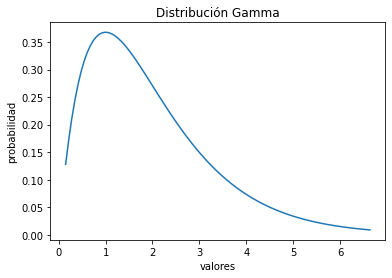

In [ ]:
# Graficando Gamma
a = 2 # parámetro de forma.
b = 1
gamma = stats.gamma(a, scale=b)
x = np.linspace(gamma.ppf(0.01),
                gamma.ppf(0.99), 100)
fp = gamma.pdf(x) # Función de Probabilidad
plt.plot(x, fp)
plt.title('Distribución Gamma')
plt.ylabel('probabilidad')
plt.xlabel('valores')
plt.show()

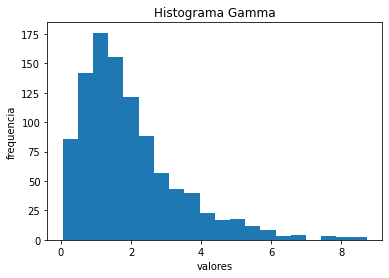

In [ ]:
# histograma
aleatorios_g = gamma.rvs(1000) # genera aleatorios
cuenta, cajas, ignorar = plt.hist(aleatorios_g, 20)
plt.ylabel('frequencia')
plt.xlabel('valores')
plt.title('Histograma Gamma')
plt.show()

Veamos varias combinaciones de parámetros $\alpha$ y $\beta$. Experimenta con otros valores.

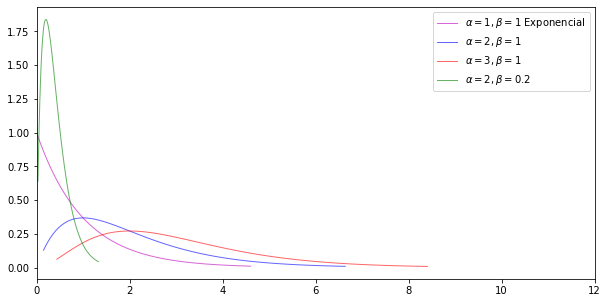

In [ ]:
a0 = 1
b0 = 1
a1 = 2
b1 = 1
a2 = 3
b2 = 1
a3 = 2
b3 = 0.2
loc = 0
size = 100

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,5))
g0 = stats.gamma(a0, scale=b0)
g1 = stats.gamma(a1, scale=b1)
g2 = stats.gamma(a2, scale=b2)
g3 = stats.gamma(a3, scale=b3)

x0 = np.linspace(g0.ppf(0.01),
                 g0.ppf(0.99), num=size)
ax.plot(x0, g0.pdf(x0),
        'm-', 
        lw=1, 
        alpha=0.6, 
        label=r'$\alpha = {}, \beta = {}$ Exponencial'.format(a0, b0))

x1 = np.linspace(g1.ppf(0.01),
                 g1.ppf(0.99), num=size)
ax.plot(x1, g1.pdf(x1),
        'b-', 
        lw=1, 
        alpha=0.6, 
        label=r'$\alpha = {}, \beta = {}$'.format(a1, b1))

x2 = np.linspace(g2.ppf(0.01),
                 g2.ppf(0.99), num=size)
ax.plot(x2, g2.pdf(x2),
        'r-', 
        lw=1, 
        alpha=0.6, 
        label=r'$\alpha = {}, \beta = {}$'.format(a2, b2))

x3 = np.linspace(g3.ppf(0.01),
                 g3.ppf(0.99), num=size)
ax.plot(x3, g3.pdf(x3),
        'g-', 
        lw=1, 
        alpha=0.6, 
        label=r'$\alpha = {}, \beta = {}$'.format(a3, b3))

plt.xlim(0,12)
plt.legend()
plt.show()

## Distribución Beta

Valores: $0 \lt x \lt 1$

Parámetros:<br>
$p$: forma, con $p\gt 0$<br>
$q$: forma, con $q\gt 0$<br>

La [Distribución Beta](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_beta) es adecuada para variables aleatorias continuas que toman valores en el intervalo (0,1), lo que la hace muy apropiada para modelar proporciones. 
Uno de los principales recursos de esta distribución es el ajuste a una gran variedad de distribuciones empíricas, pues adopta formas muy diversas dependiendo de cuáles sean los valores de los parámetros de forma p y q, mediante los que viene definida la distribución,
denotada por $Beta(p,q)$.
Está dada por la formula:

$$p(x;p, q) = \frac{1}{B(p, q)} x^{p-1}(1 - x)^{q-1}
$$

En dónde los parámetros $p$ y $q$ son números reales positivos, la variable $x$ satisface la condición $0 \le x \le 1$ y $B(p, q)$ es la [función beta](https://es.wikipedia.org/wiki/Funci%C3%B3n_beta). Las aplicaciones de la Distribución Beta incluyen el modelado de variables aleatorias que tienen un rango finito de $a$ hasta $b$. Un ejemplo de ello es la distribución de los tiempos de actividad en las redes de proyectos. 

En la [inferencia bayesiana](https://es.wikipedia.org/wiki/Inferencia_bayesiana), por ejemplo, es muy utilizada como distribución a priori cuando las
observaciones tienen una distribución binomial.

Un caso particular de la distribución beta es la **distribución uniforme** en $(0,1)$, la cual se corresponde con una beta de parámetros $p = 1$ y $q = 1$.

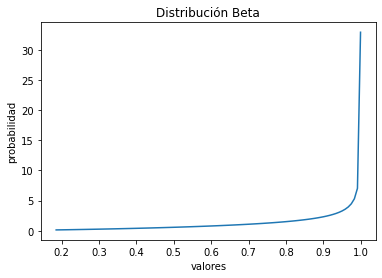

In [ ]:
# Graficando Beta
a, b = 2.3, 0.6 # parametros de forma.
beta = stats.beta(a, b)
x = np.linspace(beta.ppf(0.01),
                beta.ppf(0.99), 100)
fp = beta.pdf(x) # Función de Probabilidad
plt.plot(x, fp)
plt.title('Distribución Beta')
plt.ylabel('probabilidad')
plt.xlabel('valores')
plt.show()

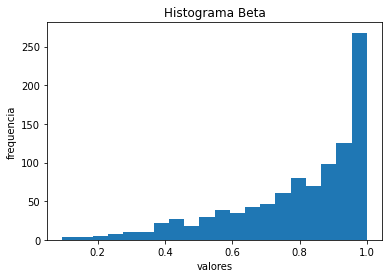

In [ ]:
# histograma
aleatorios_bt = beta.rvs(1000) # genera aleatorios
cuenta, cajas, ignorar = plt.hist(aleatorios_bt, 20)
plt.ylabel('frequencia')
plt.xlabel('valores')
plt.title('Histograma Beta')
plt.show()

### <font color='green'>Actividad 4</font>
Compruebe gráficamente que un caso particular de la distribución beta es la distribución uniforme en  (0,1).

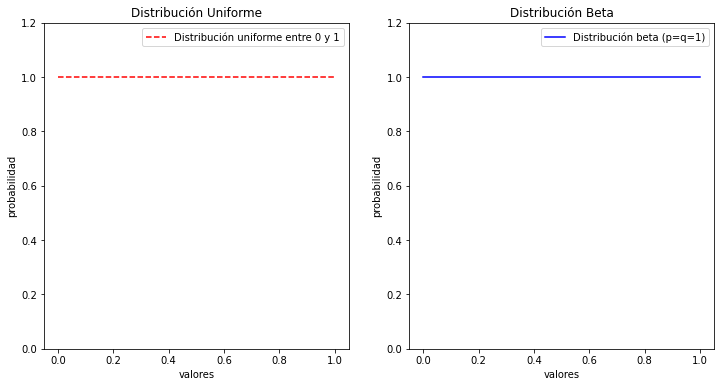

In [ ]:
a= 0
b = 1 - a

uniforme_c = stats.uniform(a, b)
x = np.linspace(uniforme_c.ppf(0.01),
                uniforme_c.ppf(0.99), 100)
fp_uniforme = uniforme_c.pdf(x) # Función de Probabilidad

# Graficando Beta
a, b = 1.0, 1.0 # parametros de forma.
beta = stats.beta(a, b)
x = np.linspace(beta.ppf(0.00001),
                beta.ppf(0.99999), 100)
fp_beta = beta.pdf(x) # Función de Probabilidad

fig, ax = plt.subplots(1,2, figsize=(12,6))
# ax[0].vlines(x, 0, fp, colors='b', lw=5, alpha=0.5)
ax[0].plot(x, fp_uniforme, '--', color='r', label = 'Distribución uniforme entre 0 y 1')
ax[0].set_yticks([0., 0.2, 0.4, 0.6, 0.8, 1., 1.2])
ax[0].set_title('Distribución Uniforme')
ax[0].set_ylabel('probabilidad')
ax[0].set_xlabel('valores')
ax[0].legend()

ax[1].plot(x, fp_beta, 'b-', label = 'Distribución beta (p=q=1)')
ax[1].set_yticks([0., 0.2, 0.4, 0.6, 0.8, 1., 1.2])
ax[1].set_title('Distribución Beta')
ax[1].set_ylabel('probabilidad')
ax[1].set_xlabel('valores')
ax[1].legend()

plt.show()

<font color='green'>Fin actividad 4</font>

## Distribución Chi-cuadrado
Valores: $0 \lt x \lt \infty$<br>
Parámetro: $n$: grados de libertad, con $n \ge 1$, entero<br>

La [Distribución Chi cuadrado](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_%CF%87%C2%B2), debe su nombre al matemático inglés Karl Pearson (1857-1936). Es una distribución fundamental en inferencia estadística. Se emplea, entre otras muchas aplicaciones, para realizar la prueba de hipótesis, de independencia o la prueba de bondad de ajuste (todas ellas denominadas **pruebas chi-cuadrado**) y para determinar los límites de confianza de la varianza muestral de una población normal. Veremos estos conceptos más adelante.

Sean $Z_{1},\dots ,Z_{k}$  variables aleatorias independientes, tales que $Z_{i}\sim N(0,1)$, para $i=1,2,\dots ,k$, entonces la variable aleatoria $X$ definida por:

$$ {\begin{aligned}X&=Z_{1}^{2}+Z_{2}^{2}+\cdots +Z_{k}^{2}\\&=\sum _{i=1}^{k}Z_{i}^{2}\end{aligned}}$$

tiene una distribución chi cuadrada con $k$ grados de libertad.

Su fórmula está dada por la función:

$$p(x; n) = \frac{\left(\frac{x}{2}\right)^{\frac{n}{2}-1} e^{\frac{-x}{2}}}{2\Gamma \left(\frac{n}{2}\right)}
$$

En dónde la variable $x \ge 0$ y el parámetro $n$, el número de grados de libertad, es un número entero positivo. Una importante aplicación de la Distribución Chi-cuadrado es que cuando un conjunto de datos es representado por un modelo teórico, esta distribución puede ser utilizada para controlar cuan bien se ajustan los valores predichos por el modelo, y los datos realmente observados.

Si $X$ sigue una distribución chi-cuadrado con $n$ grados de libertad, para valores de $n$ grandes ($n \ge 100$), entonces la variable
$Y = \sqrt{2X}$, sigue aproximadamente una distribución normal de
media $\sqrt{2n -1}$ y desviación estándar 1.

### ¿Qué son los grados de libertad?
Ver al final del notebook.

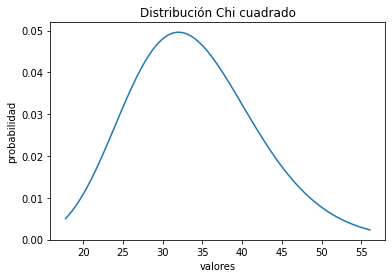

In [ ]:
# Graficando Chi cuadrado
df = 34 # parametro de forma; df es 'degrees of freedom (grados de libertad)
chi2 = stats.chi2(df)
x = np.linspace(chi2.ppf(0.01),
                chi2.ppf(0.99), 100)
fp = chi2.pdf(x) # Función de Probabilidad
plt.plot(x, fp)
plt.title('Distribución Chi cuadrado')
plt.ylabel('probabilidad')
plt.xlabel('valores')
plt.show()

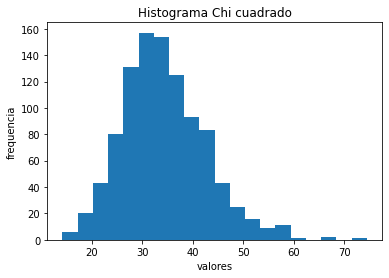

In [ ]:
# histograma
aleatorios_chi = chi2.rvs(1000) # genera aleatorios
frecuencia, bins, ignorar = plt.hist(aleatorios_chi, 20)
plt.ylabel('frequencia')
plt.xlabel('valores')
plt.title('Histograma Chi cuadrado')
plt.show()

### <font color='green'>Actividad 5</font>
Para estudiar la relación entre la edad de las mujeres y su aceptación de una ley sobre interrupción del embarazo se ha llevado a cabo una encuesta sobre 400 mujeres cuyos resultados (aceptación _Baja_, _Media_, o _Alta_) se recogen en la siguiente tabla:


| Edad | Baja | Media | Alta |
|:----:|:----:|:-----:|:----:|
|0-18| 21| 34| 25|
|18-35| 24 |31 |25|
|36-50| 30 |30 |20|
|51-65| 37| 30 |13|
|$\gt$ 65 |40| 30 |10|

Como resultado de aplicar la prueba chi-cuadrado de Pearson se obtuvo como valor del estadístico $\chi^2 = 19,2828$. Este valor por si solo no permite extraer ninguna conclusión; debe compararse con el valor de la distribución chi-cuadrado de $(5-1)*(3-1)=8$ grados de libertad que deja un 5% de probabilidad a su derecha, fijado un nivel de significación del 5% o,
equivalentemente, un nivel de confianza del 95%. Este valor, llamado punto crítico, delimita la zona de rechazo de la hipótesis nula de no asociación entre las variables.

1. Calcular el valor de la chi-cuadrado con 8 grados de libertad que deja a su derecha un área bajo la curva igual a 0,05.
2. Representar la función de densidad y marcar en ella el valor del estadístico y el punto crítico, ¿qué puede concluirse acerca de la relación entre las dos variables?
3. Calcular el valor $p$ del estadístico, es decir, la probabilidad a la derecha del valor del estadístico $\chi^2 =19,2828$.

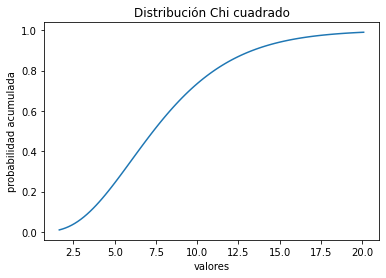

In [2]:
# Tu código aquí ...

# REVISAR!!

# Calcular el valor de la chi-cuadrado con 8 grados de libertad que deja a su derecha un área bajo la curva igual a 0,05.
# clases = 6
# nivel_acept = 3
# df = (clases - 1 )*(nivel_acept - 1)
df = 8 # parametro de forma; df es 'degrees of freedom (grados de libertad)
chi2 = stats.chi2(df)
x = np.linspace(chi2.ppf(0.01),
                chi2.ppf(0.99), 100)
fp = chi2.cdf(x) # Función de Probabilidad acumulada
plt.plot(x, fp)
plt.title('Distribución Chi cuadrado')
plt.ylabel('probabilidad acumulada')
plt.xlabel('valores')
plt.show()


In [3]:
#el valor de fp cuando deja 0.05 a la derecha
valor_fp = chi2.ppf(0.95) # Percent point function (inverse of cdf — percentiles).
valor_fp

15.50731305586545

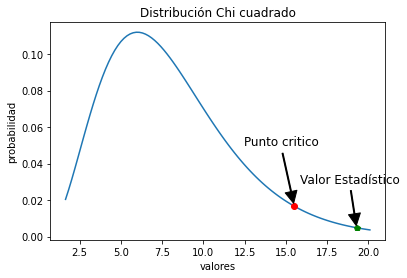

In [ ]:
# Representar la función de densidad y marcar en ella el valor del estadístico y el punto crítico, 
# ¿qué puede concluirse acerca de la relación entre las dos variables?

fp2 = chi2.pdf(x) # 
plt.plot(x, fp2)
plt.plot(valor_fp, chi2.pdf(valor_fp), 'ro')
plt.plot(19.2828, chi2.pdf(19.2828), 'pg')

plt.annotate('Punto critico', xy=(valor_fp, chi2.pdf(valor_fp)), 
             xycoords='data', xytext=(valor_fp*0.95, chi2.pdf(valor_fp)*3), 
             arrowprops=dict(facecolor='black', shrink=0.05, width=1),
             size=12, ha="center")

plt.annotate('Valor Estadístico', xy=(19.2828, chi2.pdf(19.2828)), 
             xycoords='data', xytext=(19.2828*0.98, chi2.pdf(19.2828)*6), 
             arrowprops=dict(facecolor='black', shrink=0.05, width=1),
             size=12, ha="center")


plt.title('Distribución Chi cuadrado')
plt.ylabel('probabilidad')
plt.xlabel('valores')
plt.show()

**_Conclusión_**: Se rechaza la hipotesis nula ($H_0$: No existe relación), por lo que se acepta $H_1$. En consecuencia, si existe relación entre la edad de las mujeres y su aceptación a una ley sobre interrupción del embarazo.

In [7]:
# Calcular el valor  p  del estadístico, es decir, la probabilidad a la derecha del valor del estadístico  χ2=19,2828 .
valor_p = 1 - chi2.cdf(19.2828)
print(f'El valor-p del estadistico es {valor_p: 2.4f}')

El valor-p del estadistico es  0.0134


<font color='green'>Fin actividad 5</font>

### Distribución T de Student
Valores: $-\infty \lt x \lt \infty$<br>
Parámetro: Parámetro: $n$: grados de libertad, con $n \ge 1$, entero<br>

La [Distribución t de Student](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_t_de_Student) fue propuesta y tabulada por William Sealy Gosset (1876-1937), más onocido por el seudónimo de Student, como resultado de un estudio sobre la estimación de la media cuando el tamaño de muestra es pequeño, estos resultados fueron publicados en 1908 en el artículo The Probable Error of a Mean. La distribución t de Student queda completamente definida por medio de sus grados de libertad, $n$, y se denota por $t_n$. Surge cuando se plantea estudiar el cociente entre una variable aleatoria con distribución normal estándar y la raíz cuadrada del cociente entre una variable
aleatoria con distribución chi-cuadrado y sus grados de libertad ($n$), siendo las dos variables independientes. Esta distribución desempeña un papel muy importante en la inferencia estadística asociada a la teoría de muestras pequeñas y es usada habitualmente en el contraste de hipótesis para la media de una población o para comparar medias de dos poblaciones.

En cuanto a la forma que presenta su función de densidad cabe destacar las similitudes que mantiene con la función de densidad de la distribución normal estándar: forma acampanada, simétrica y centrada en el origen; la única diferencia existente entre ambas distribuciones es que la función de densidad de la t de Student presenta unas colas más pesadas (mayor
dispersión) que la normal.

Está dada por la función:

$$p(t; n) = \frac{\Gamma(\frac{n+1}{2})}{\sqrt{n\pi}\Gamma(\frac{n}{2})} \left( 1 + \frac{t^2}{2} \right)^{-\frac{n+1}{2}}
$$

En dónde la variable $t$ es un número real y el parámetro $n$ es un número entero positivo. La Distribución t de Student es utilizada para probar si la diferencia entre las *medias* de dos muestras de observaciones es estadísticamente significativa. Por ejemplo, las alturas de una muestra aleatoria de los jugadores de baloncesto podría compararse con las alturas de una muestra aleatoria de jugadores de fútbol; esta distribución nos podría ayudar a determinar si un grupo es significativamente más alto que el otro.

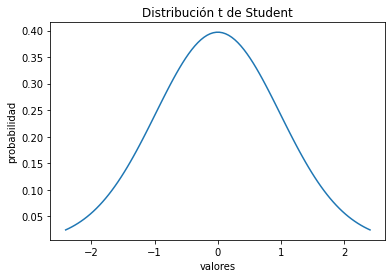

In [ ]:
# Graficando t de Student
df = 50 # parametro de forma, df = degrees of freedom (grados de libertad)
t = stats.t(df)
x = np.linspace(t.ppf(0.01),
                t.ppf(0.99), 100)
fp = t.pdf(x) # Función de Probabilidad
plt.plot(x, fp)
plt.title('Distribución t de Student')
plt.ylabel('probabilidad')
plt.xlabel('valores')
plt.show()

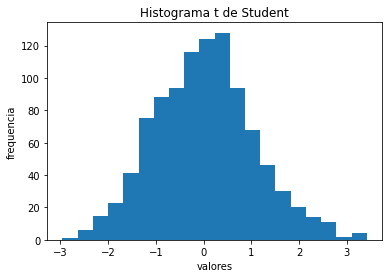

In [ ]:
# histograma
aleatorios = t.rvs(1000) # genera aleatorios
cuenta, cajas, ignorar = plt.hist(aleatorios, 20)
plt.ylabel('frequencia')
plt.xlabel('valores')
plt.title('Histograma t de Student')
plt.show()

### <font color='green'>Actividad 6</font>
Determine gráficamente en qué condiciones de grados de libertad la distribución t-student se aproxima a una $Normal(0,1)$

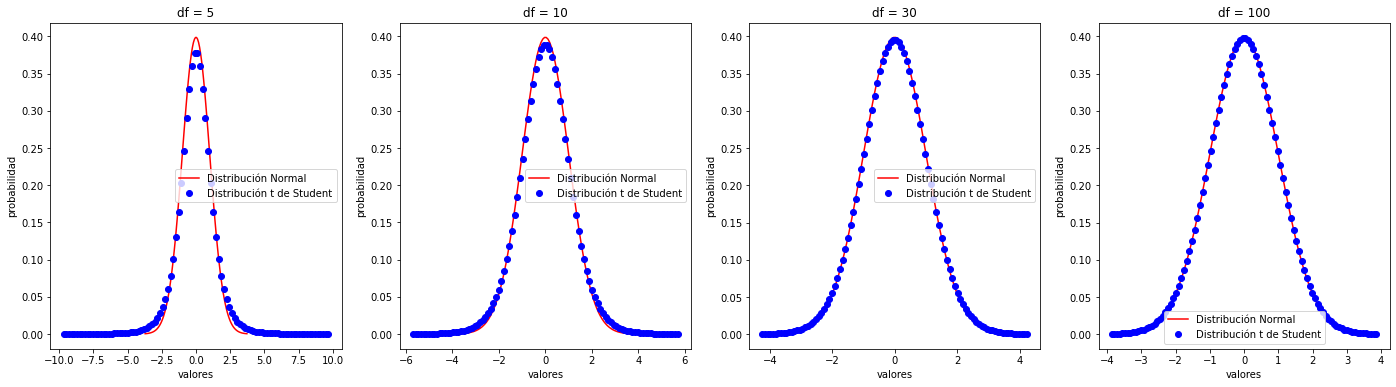

In [18]:
# Tu código aquí ...

#Distribución normal con media cero y desviación estandar 1
mu, sigma = 0, 1 # media y desvio estandar
normal = stats.norm(mu, sigma)
x1 = np.linspace(normal.ppf(0.0001),
                normal.ppf(0.9999), 100)

fig, ax = plt.subplots(1,4, figsize=(24,6))
count_plot = 0

for df in [5, 10, 30, 100]:
  # df = 5 # parametro de forma, df = degrees of freedom (grados de libertad)
  t = stats.t(df)
  x2 = np.linspace(t.ppf(0.0001),
                  t.ppf(0.9999), 100)

  fp_normal = normal.pdf(x1) # Función de Probabilidad
  fp_t = t.pdf(x2) # Función de Probabilidad

  ax[count_plot].plot(x1, fp_normal, 'r', label='Distribución Normal')
  ax[count_plot].plot(x2, fp_t, 'bo', label='Distribución t de Student')
  ax[count_plot].set_title('df = '+str(df))
  ax[count_plot].set_ylabel('probabilidad')
  ax[count_plot].set_xlabel('valores')
  ax[count_plot].legend()

  count_plot += 1
  
plt.show()

**_Conclusion_**: Sobre df>30 la distribución t-Student se parece a la distribución normal. A los df=100 ya es practicamente la misma distribución.

<font color='green'>Fin actividad 6</font>

## Distribución de Pareto

La [Distribución de Pareto](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_de_Pareto) fue introducida por el economista italiano Vilfredo Pareto (1848- 1923) como un modelo para explicar la distribución de las rentas de los individuos de una población, siempre y cuando se partiera de dos supuestos, la existencia de un umbral inferior ($x_0$) de forma que no haya rentas inferiores a dicho umbral y el decrecimiento de manera potencial del porcentaje de individuos con una renta superior o igual a un cierto valor de
renta a medida que dicho valor de renta crece. El uso de esta distribución se ha ido ampliando a diferentes ámbitos de estudio. Se trata de una distribución biparamétrica, con parámetros de forma ($\alpha$) y de situación ($x_0$).
El parámetro $x_0$ es un indicador de posición (valor mínimo) que, en términos económicos, puede interpretarse como el ingreso mínimo de la población. El parámetro $\alpha$ está asociado con la dispersión, donde a mayor valor se obtienen densidades de Pareto más concentradas en las proximidades de $x_0$, es decir, menos dispersas.

La distribución está dada por la función:

$$p(x; \alpha, x_0) = \frac{\alpha x_0^{\alpha}}{x_0^{\alpha + 1}} 
$$

En dónde la variable $x \ge x_0$ y el parámetro $\alpha > 0$ son números reales. La Distribución de Pareto se describe a menudo como la base de la [regla 80/20](https://es.wikipedia.org/wiki/Principio_de_Pareto). Por ejemplo, el 80% de las quejas de los clientes con respecto al funcionamiento de su vehículo por lo general surgen del 20% de los componentes.

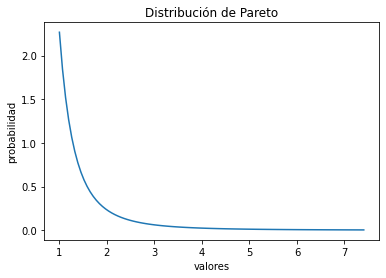

In [19]:
# Graficando Pareto
k = 2.3 # parametro de forma.
pareto = stats.pareto(k)
x = np.linspace(pareto.ppf(0.01),
                pareto.ppf(0.99), 100)
fp = pareto.pdf(x) # Función de Probabilidad
plt.plot(x, fp)
plt.title('Distribución de Pareto')
plt.ylabel('probabilidad')
plt.xlabel('valores')
plt.show()

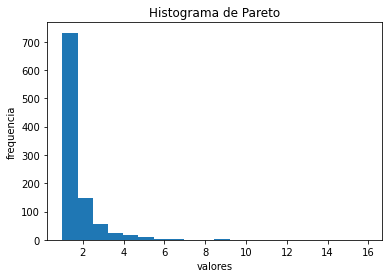

In [20]:
# histograma
aleatorios = pareto.rvs(1000) # genera aleatorios
cuenta, cajas, ignorar = plt.hist(aleatorios, 20)
plt.ylabel('frequencia')
plt.xlabel('valores')
plt.title('Histograma de Pareto')
plt.show()

## ¿Cómo elegir la distribución que mejor se ajusta a mis datos?

Ahora ya tenemos un conocimiento general de las principales distribuciones con que nos podemos encontrar; pero ¿cómo determinamos que distribución debemos utilizar?

Un modelo que podemos seguir cuando nos encontramos con datos que necesitamos ajustar a una distribución, es comenzar con los datos sin procesar y responder a cuatro preguntas básicas acerca de los mismos, que nos pueden ayudar a caracterizarlos. 

La **primer pregunta** se refiere a si los datos **pueden tomar valores discretos** o **continuos**. 

La **segunda pregunta** que nos debemos hacer, hace referencia a la [simetría](https://es.wikipedia.org/wiki/Asimetr%C3%ADa_estad%C3%ADstica) de los datos y, si es que hay asimetría, en qué dirección se encuentra; en otras palabras, son los [valores atípicos](https://es.wikipedia.org/wiki/Valor_at%C3%ADpico) positivos y negativos igualmente probables o es uno más probable que el otro.

**La tercer pregunta** abarca los **límites superiores e inferiores en los datos**; hay algunos datos, como los ingresos, que no pueden ser inferiores a cero, mientras que hay otros, como los márgenes de operación que no puede exceder de un valor (100%). 

**La última pregunta** se refiere a la **posibilidad de observar valores extremos** en la distribución; en algunos casos, los valores extremos ocurren con muy poca frecuencia, mientras que en otros, se producen con mayor frecuencia.

Este proceso, lo podemos resumir en el siguiente gráfico:

<img alt="Distribuciones estadísticas" title="Distribuciones estadísticas" src="https://relopezbriega.github.io/images/distributions_choice.png" >

Con la ayuda de estas preguntas fundamentales, más el conocimiento de las distintas distribuciones deberíamos estar en condiciones de poder caracterizar cualquier conjunto de datos.

## ¿Qué son los grados de libertad?

En la estadística inferencial, el término __grados de libertad__ se define normalmente como el número de observaciones que son libres de variar, dada una o más restricciones matemáticas, en un conjunto de valores utilizados para estimar alguna característica de la población.

Dicho de otra manera, los grados de libertad son el número de observaciones independientes menos el número de restricciones asociado a esas observaciones.

### Veamos un ejemplo con la varianza muestral 
Grados de libertad en el cálculo de la varianza muestral
Seguramente, la primera vez donde nos encontramos este concepto es a la hora de calcular la varianza de una muestra, medida que representa la variabilidad de un conjunto de datos de una muestra y que se calcula mediante la siguiente fórmula:

$$ s^{2}={\frac {1}{n-1}}\sum _{i=1}^{n}\left(x_{i}-{\overline {x}}\right)^{2}$$

donde

$x_i$ es valor la observación número $i$.
$x\overline {x}$ es la media de la muestra.
$n$ es el número de observaciones en la muestra.

En esta formula, los grados de libertad se encuentran en el denominador y equivalen al __número de observaciones menos 1__ $(n – 1)$, por lo que solo tenemos una única restricción. 

Esta restricción se debe a que para calcular la varianza muestral es necesario calcular previamente la media de la muestra ($\overline {x}$), por lo que el último valor y única observación que no es libre de variar, se puede obtener fácilmente utilizando el resto de observaciones.

Asimismo, en el caso de la media muestral, los grados de libertad equivalen al número de observaciones $n$, ya que no contamos con ninguna restricción.

A modo de ejemplo, imaginemos que tenemos una muestra con 5 observaciones, sabemos que la media muestral corresponde a 8 y queremos calcular la varianza muestral. La restricción que se debe cumplir consiste en que la suma de todos los datos ($x1 + x2 + x3 + x4 + x5$) debe ser igual a $n \times \overline{x}$, en este caso, $5 \times 8 = 40$.

Otra manera de verlo es que la suma de las desviaciones de las observaciones con respecto a la media $(x1 – \overline{x}, x2 – \overline{x}, x3 – \overline{x}, x4 – \overline{x}$ y $5 – \overline{x})$ debe ser igual a cero.

Con esta restricción, tenemos que los primeros 4 valores pueden ser cualquier número, pero para que los 5 valores sumen 40, el último valor no puede variar. Por lo tanto, tenemos 4 grados de libertad.

Así, si los primeros 4 valores son 6, 6, 8 y 10, sabemos automáticamente que el último valor corresponde a 10, ya que la suma de los 5 números debe ser igual a 40.

Si utilizásemos $n$ para calcular la varianza, estaríamos subestimando la variabilidad de la población. Por ello, recurrimos a $n – 1$ para conseguir una estimación no sesgada de la varianza de la población.

